# Childcare Affordability in the U.S
## Exploratory Data Analysis

In this phase of the project, we will explore and analyze the data in more depth. Let's talk about what we found out. 

While graphing the data, I noticed that figures from different childcare were missing entirely. As it turns out, California childcare for toddler and preschool either cost the same or have the exact same numbers accross the board. Regardless, from here on own, I will only have data from infants and toddlers. For data about preschoolers, we can just look at the toddler data. 

Next, it is important to note that we will have to weigh a lot of the data in accordance to population. That was an extra step that required a lot more work than previously anticipated. 

My goal in this section, is to formulate an idea of what is going on in the relationship between Median Household Income and the cost of childcare. I plan on graphing both to see how their real and relative dollars compare. My expectation is still that day care outpaces income growth. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile
import imageio
import os
from IPython.display import display, Image

In [2]:
# loading the data
df = pd.read_csv("Data_Wrangling")

In [3]:
# looking at the columns 
df.head()

,County_Name,StudyYear,MHI,MHI_2018,TotalPop,Households,MCInfant,MCToddler,MCPreschool,MFCCInfant,MFCCToddler,MFCCPreschool
0,Alameda County,2008,70079.0,80590.85,1457169,518352,301.77,214.22,214.22,192.32,178.26,178.26
1,Alameda County,2009,68863.0,80569.71,1457095,520096,312.76,234.23,234.23,199.98,178.56,178.56
2,Alameda County,2010,69384.0,80485.44,1477980,532026,313.14,234.95,234.95,201.32,181.19,181.19
3,Alameda County,2011,70821.0,79319.52,1494876,536160,313.53,235.68,235.68,202.66,183.83,183.83
4,Alameda County,2012,71516.0,78667.60,1515136,539179,313.91,236.40,236.40,204.00,186.46,186.46


In [4]:
# Statistical data
df.describe()

,StudyYear,MHI,MHI_2018,TotalPop,Households,MCInfant,MCToddler,MCPreschool,MFCCInfant,MFCCToddler,MFCCPreschool
count,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,2013.000000,57110.376708,62078.513621,6.498302e+05,2.166075e+05,270.840031,193.976003,193.976003,173.336489,160.905408,160.905408
std,3.164759,15145.245314,16160.518164,1.422954e+06,4.651976e+05,45.443604,35.998808,35.998808,33.600739,30.523047,30.523047
min,2008.000000,33286.440000,37033.500000,1.131000e+03,2.990000e+02,182.420000,145.630000,145.630000,128.530000,121.040000,121.040000
25%,2010.000000,45475.000000,49468.140000,4.530300e+04,1.826675e+04,242.010000,169.735000,169.735000,150.627500,140.090000,140.090000
50%,2013.000000,54344.000000,58854.580000,1.793075e+05,6.860300e+04,258.145000,182.360000,182.360000,166.400000,152.720000,152.720000
75%,2016.000000,66003.250000,71794.640000,6.916418e+05,2.150802e+05,296.402500,211.977500,211.977500,191.000000,175.267500,175.267500
max,2018.000000,116178.000000,116178.000000,1.010572e+07,3.306109e+06,462.330000,356.510000,356.510000,318.220000,305.090000,305.090000


Above, we see that Toddler and Preschool are the same numbers. We will get rid of Preschool and just have infant and toddler. 

In [5]:
# dropping columns
df = df.drop(['MCPreschool', 'MFCCPreschool'], axis=1)

In [6]:
# Renaming to less jargon terms
df.rename(columns={'MCToddler': 'Toddler (Center-based)', 'MFCCToddler': 'Toddler (Home-based)', 'MCInfant': 'Infant (Center-based)', 'MFCCInfant': 'Infant (Home-based)'}, inplace=True)


In [7]:
df.head()

,County_Name,StudyYear,MHI,MHI_2018,TotalPop,Households,Infant (Center-based),Toddler (Center-based),Infant (Home-based),Toddler (Home-based)
0,Alameda County,2008,70079.0,80590.85,1457169,518352,301.77,214.22,192.32,178.26
1,Alameda County,2009,68863.0,80569.71,1457095,520096,312.76,234.23,199.98,178.56
2,Alameda County,2010,69384.0,80485.44,1477980,532026,313.14,234.95,201.32,181.19
3,Alameda County,2011,70821.0,79319.52,1494876,536160,313.53,235.68,202.66,183.83
4,Alameda County,2012,71516.0,78667.60,1515136,539179,313.91,236.40,204.00,186.46


In [8]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   County_Name             638 non-null    object 
 1   StudyYear               638 non-null    int64  
 2   MHI                     638 non-null    float64
 3   MHI_2018                638 non-null    float64
 4   TotalPop                638 non-null    int64  
 5   Households              638 non-null    int64  
 6   Infant (Center-based)   638 non-null    float64
 7   Toddler (Center-based)  638 non-null    float64
 8   Infant (Home-based)     638 non-null    float64
 9   Toddler (Home-based)    638 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 50.0+ KB


Let's take a look the weighted average Median Household Income.

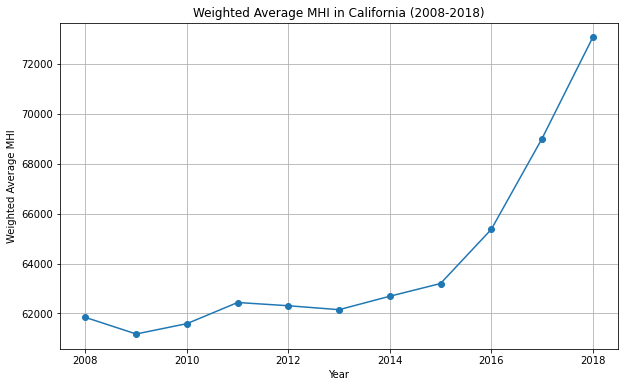

In [9]:
# Calculate the weighted average MHI for each year
# First, calculate the product of MHI and TotalPop for each row, then group by StudyYear and sum those products
# Finally, divide by the sum of TotalPop for each year to get the weighted average
weighted_avg_mhi = (df['MHI'] * df['TotalPop']).groupby(df['StudyYear']).sum() / df.groupby('StudyYear')['TotalPop'].sum()

# Create a line plot of weighted average MHI over the years
plt.figure(figsize=(10, 6))
weighted_avg_mhi.plot(marker='o')
plt.title('Weighted Average MHI in California (2008-2018)')
plt.xlabel('Year')
plt.ylabel('Weighted Average MHI')
plt.grid(True)
plt.show()

Here we see that wage growth lagged the first few years of our study and then went up sharply. This is most likely from a recovering economy after the Great Recession. 

Next, we will look at the cost of childcare followed by bringing all that data together.

In [10]:
# Group the data by StudyYear
grouped = df.groupby('StudyYear')

for year, group in grouped:
    print("Year:", year)
    
    # Calculate weighted costs for each age group in the current year
    group['WeightedCostInfant'] = group['Infant (Center-based)'] * group['TotalPop']
    group['WeightedCostToddler'] = group['Toddler (Center-based)'] * group['TotalPop']
    group['WeightedCostFCCInfant'] = group['Infant (Home-based)'] * group['TotalPop']
    group['WeightedCostFCCToddler'] = group['Toddler (Home-based)'] * group['TotalPop']
    
    # Calculate total weighted cost and total population for each age group in the current year
    total_weighted_cost_infant = group['WeightedCostInfant'].sum()
    total_weighted_cost_toddler = group['WeightedCostToddler'].sum()
    total_weighted_cost_fcc_infant = group['WeightedCostFCCInfant'].sum()
    total_weighted_cost_fcc_toddler = group['WeightedCostFCCToddler'].sum()
    
    total_population_infant = group['TotalPop'].sum()
    total_population_toddler = group['TotalPop'].sum()
    total_population_fcc_infant = group['TotalPop'].sum()
    total_population_fcc_toddler = group['TotalPop'].sum()
    
    # Calculate weighted average cost for each age group in the current year
    weighted_average_cost_infant = total_weighted_cost_infant / total_population_infant
    weighted_average_cost_toddler = total_weighted_cost_toddler / total_population_toddler
    weighted_average_cost_fcc_infant = total_weighted_cost_fcc_infant / total_population_fcc_infant
    weighted_average_cost_fcc_toddler = total_weighted_cost_fcc_toddler / total_population_fcc_toddler
    
    print("Weighted Average Cost of Childcare for Infants (Center-based):", weighted_average_cost_infant)
    print("Weighted Average Cost of Childcare for Toddlers (Center-based):", weighted_average_cost_toddler)
    print("Weighted Average Cost of Childcare for Infants (Family Childcare):", weighted_average_cost_fcc_infant)
    print("Weighted Average Cost of Childcare for Toddlers (Family Childcare):", weighted_average_cost_fcc_toddler)
    print("\n")

Year: 2008
Weighted Average Cost of Childcare for Infants (Center-based): 259.5547348999877
Weighted Average Cost of Childcare for Toddlers (Center-based): 186.38479875734657
Weighted Average Cost of Childcare for Infants (Family Childcare): 169.06242133857307
Weighted Average Cost of Childcare for Toddlers (Family Childcare): 156.3421179460302


Year: 2009
Weighted Average Cost of Childcare for Infants (Center-based): 274.79934299152376
Weighted Average Cost of Childcare for Toddlers (Center-based): 208.48562871002724
Weighted Average Cost of Childcare for Infants (Family Childcare): 173.87644110101186
Weighted Average Cost of Childcare for Toddlers (Family Childcare): 159.38555996612038


Year: 2010
Weighted Average Cost of Childcare for Infants (Center-based): 282.7135713716817
Weighted Average Cost of Childcare for Toddlers (Center-based): 213.55789773424834
Weighted Average Cost of Childcare for Infants (Family Childcare): 177.68815865638533
Weighted Average Cost of Childcare for 

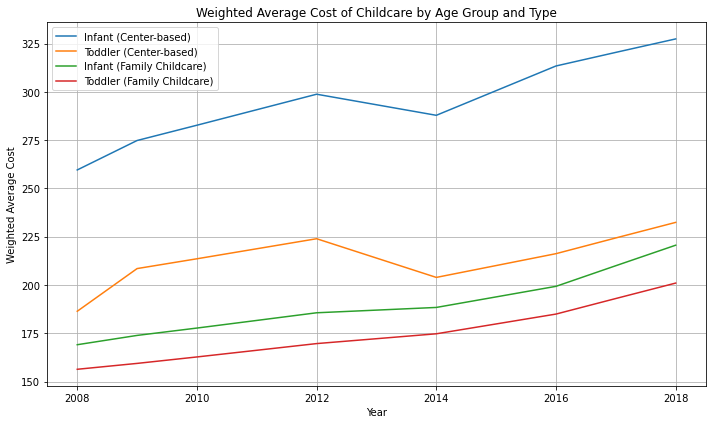

In [11]:
# Group the data by StudyYear
grouped = df.groupby('StudyYear')

# Lists to store data for plotting
years = []
avg_costs_infant_center = []
avg_costs_toddler_center = []
avg_costs_infant_fcc = []
avg_costs_toddler_fcc = []

for year, group in grouped:
    years.append(year)
    
    # Calculate weighted costs for each age group in the current year
    group['WeightedCostInfant'] = group['Infant (Center-based)'] * group['TotalPop']
    group['WeightedCostToddler'] = group['Toddler (Center-based)'] * group['TotalPop']
    group['WeightedCostFCCInfant'] = group['Infant (Home-based)'] * group['TotalPop']
    group['WeightedCostFCCToddler'] = group['Toddler (Home-based)'] * group['TotalPop']
    
    # Calculate total weighted cost and total population for each age group in the current year
    total_weighted_cost_infant = group['WeightedCostInfant'].sum()
    total_weighted_cost_toddler = group['WeightedCostToddler'].sum()
    total_weighted_cost_fcc_infant = group['WeightedCostFCCInfant'].sum()
    total_weighted_cost_fcc_toddler = group['WeightedCostFCCToddler'].sum()
    
    total_population_infant = group['TotalPop'].sum()
    total_population_toddler = group['TotalPop'].sum()
    total_population_fcc_infant = group['TotalPop'].sum()
    total_population_fcc_toddler = group['TotalPop'].sum()
    
    # Calculate weighted average cost for each age group in the current year
    weighted_average_cost_infant = total_weighted_cost_infant / total_population_infant
    weighted_average_cost_toddler = total_weighted_cost_toddler / total_population_toddler
    weighted_average_cost_fcc_infant = total_weighted_cost_fcc_infant / total_population_fcc_infant
    weighted_average_cost_fcc_toddler = total_weighted_cost_fcc_toddler / total_population_fcc_toddler
    
    avg_costs_infant_center.append(weighted_average_cost_infant)
    avg_costs_toddler_center.append(weighted_average_cost_toddler)
    avg_costs_infant_fcc.append(weighted_average_cost_fcc_infant)
    avg_costs_toddler_fcc.append(weighted_average_cost_fcc_toddler)

# Create line plots for each category
plt.figure(figsize=(10, 6))

plt.plot(years, avg_costs_infant_center, label='Infant (Center-based)')
plt.plot(years, avg_costs_toddler_center, label='Toddler (Center-based)')
plt.plot(years, avg_costs_infant_fcc, label='Infant (Family Childcare)')
plt.plot(years, avg_costs_toddler_fcc, label='Toddler (Family Childcare)')

plt.xlabel('Year')
plt.ylabel('Weighted Average Cost')
plt.title('Weighted Average Cost of Childcare by Age Group and Type')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

We can see that childcare cost generally went up most years at a steady rate. 



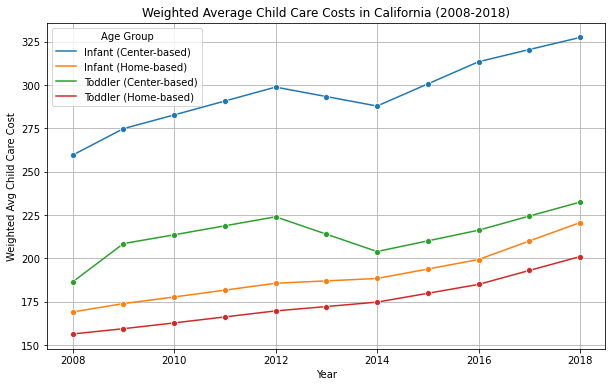

In [12]:
# Create a DataFrame for just the child care cost columns and the 'StudyYear' column
childcare_cost_df = df[['StudyYear', 'Infant (Center-based)', 'Toddler (Center-based)', 'Infant (Home-based)', 'Toddler (Home-based)', 'TotalPop']]

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars=['StudyYear', 'TotalPop'], var_name='Age_Group', value_name='Child_Care_Cost')

# Group the data by StudyYear and Age_Group
grouped = childcare_cost_df.groupby(['StudyYear', 'Age_Group'])

# Calculate the weighted average child care cost for each year and age group
weighted_avg_cost = grouped.apply(lambda x: (x['Child_Care_Cost'] * x['TotalPop']).sum() / x['TotalPop'].sum())

# Reset index to make the result a DataFrame
weighted_avg_cost = weighted_avg_cost.reset_index()
weighted_avg_cost.columns = ['StudyYear', 'Age_Group', 'Weighted_Avg_Child_Care_Cost']

# Plot child care costs over time for different age groups (with population weighting)
plt.figure(figsize=(10, 6))
sns.lineplot(data=weighted_avg_cost, x='StudyYear', y='Weighted_Avg_Child_Care_Cost', hue='Age_Group', marker='o')
plt.xlabel('Year')
plt.ylabel('Weighted Avg Child Care Cost')
plt.title('Weighted Average Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')
plt.show()

Next we are going to look at the range of prices in childcare. 

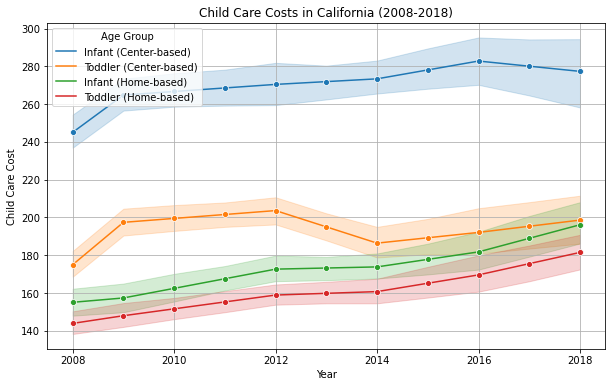

In [13]:
# Create a DataFrame for just the child care cost columns and the 'StudyYear' column
childcare_cost_df = df[['StudyYear', 'Infant (Center-based)', 'Toddler (Center-based)', 'Infant (Home-based)', 'Toddler (Home-based)']] 

# Melt the DataFrame to combine the child care cost columns
childcare_cost_df = childcare_cost_df.melt(id_vars='StudyYear', var_name='Age_Group', value_name='Child_Care_Cost')

# Plot child care costs over time for different age groups (same code as before)
plt.figure(figsize=(10, 6))
sns.lineplot(data=childcare_cost_df, x='StudyYear', y='Child_Care_Cost', hue='Age_Group', marker='o')
plt.xlabel('Year')
plt.ylabel('Child Care Cost')
plt.title('Child Care Costs in California (2008-2018)')
plt.grid(True)
plt.legend(title='Age Group', loc='upper left')
plt.show()

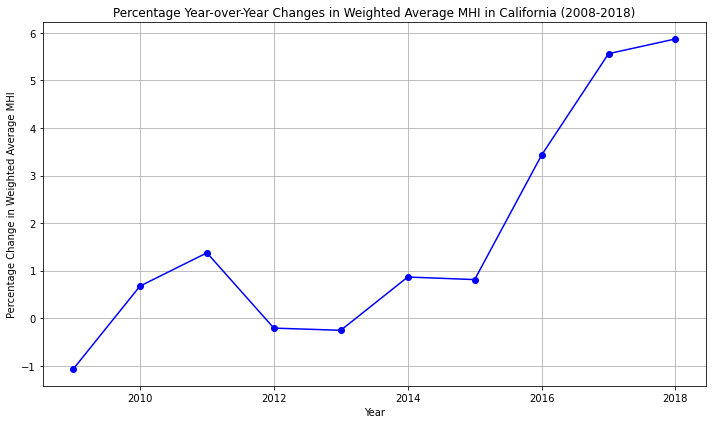

In [14]:
# Calculate the weighted average MHI for each year
weighted_avg_mhi = (df['MHI'] * df['TotalPop']).groupby(df['StudyYear']).sum() / df.groupby('StudyYear')['TotalPop'].sum()

# Calculate the percentage year-over-year changes in weighted average MHI
percentage_changes = weighted_avg_mhi.pct_change() * 100

# Create a line plot of percentage year-over-year changes in weighted average MHI
plt.figure(figsize=(10, 6))
percentage_changes.plot(marker='o', color='blue', linestyle='-')
plt.title('Percentage Year-over-Year Changes in Weighted Average MHI in California (2008-2018)')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Weighted Average MHI')
plt.grid(True)
plt.tight_layout()

plt.show()

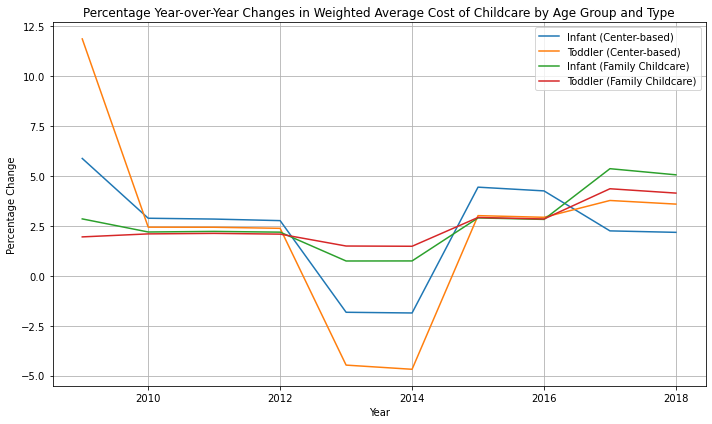

In [15]:
# Group the data by StudyYear
grouped = df.groupby('StudyYear')

# Lists to store data for plotting
years = []
percentage_changes_infant_center = []
percentage_changes_toddler_center = []
percentage_changes_infant_fcc = []
percentage_changes_toddler_fcc = []

prev_avg_costs_infant_center = None
prev_avg_costs_toddler_center = None
prev_avg_costs_infant_fcc = None
prev_avg_costs_toddler_fcc = None

for year, group in grouped:
    years.append(year)
    
    # Calculate weighted average costs for each age group in the current year
    total_weighted_cost_infant = group['Infant (Center-based)'] * group['TotalPop']
    total_weighted_cost_toddler = group['Toddler (Center-based)'] * group['TotalPop']
    total_weighted_cost_fcc_infant = group['Infant (Home-based)'] * group['TotalPop']
    total_weighted_cost_fcc_toddler = group['Toddler (Home-based)'] * group['TotalPop']
    
    total_population_infant = group['TotalPop'].sum()
    total_population_toddler = group['TotalPop'].sum()
    total_population_fcc_infant = group['TotalPop'].sum()
    total_population_fcc_toddler = group['TotalPop'].sum()
    
    avg_cost_infant_center = total_weighted_cost_infant.sum() / total_population_infant
    avg_cost_toddler_center = total_weighted_cost_toddler.sum() / total_population_toddler
    avg_cost_infant_fcc = total_weighted_cost_fcc_infant.sum() / total_population_fcc_infant
    avg_cost_toddler_fcc = total_weighted_cost_fcc_toddler.sum() / total_population_fcc_toddler
    
    if prev_avg_costs_infant_center is not None:
        percentage_change_infant_center = ((avg_cost_infant_center - prev_avg_costs_infant_center) / prev_avg_costs_infant_center) * 100
        percentage_change_toddler_center = ((avg_cost_toddler_center - prev_avg_costs_toddler_center) / prev_avg_costs_toddler_center) * 100
        percentage_change_infant_fcc = ((avg_cost_infant_fcc - prev_avg_costs_infant_fcc) / prev_avg_costs_infant_fcc) * 100
        percentage_change_toddler_fcc = ((avg_cost_toddler_fcc - prev_avg_costs_toddler_fcc) / prev_avg_costs_toddler_fcc) * 100
        
        percentage_changes_infant_center.append(percentage_change_infant_center)
        percentage_changes_toddler_center.append(percentage_change_toddler_center)
        percentage_changes_infant_fcc.append(percentage_change_infant_fcc)
        percentage_changes_toddler_fcc.append(percentage_change_toddler_fcc)
    
    prev_avg_costs_infant_center = avg_cost_infant_center
    prev_avg_costs_toddler_center = avg_cost_toddler_center
    prev_avg_costs_infant_fcc = avg_cost_infant_fcc
    prev_avg_costs_toddler_fcc = avg_cost_toddler_fcc

# Create line plots for percentage year-over-year changes
plt.figure(figsize=(10, 6))

plt.plot(years[1:], percentage_changes_infant_center, label='Infant (Center-based)')
plt.plot(years[1:], percentage_changes_toddler_center, label='Toddler (Center-based)')
plt.plot(years[1:], percentage_changes_infant_fcc, label='Infant (Family Childcare)')
plt.plot(years[1:], percentage_changes_toddler_fcc, label='Toddler (Family Childcare)')

plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Year-over-Year Changes in Weighted Average Cost of Childcare by Age Group and Type')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

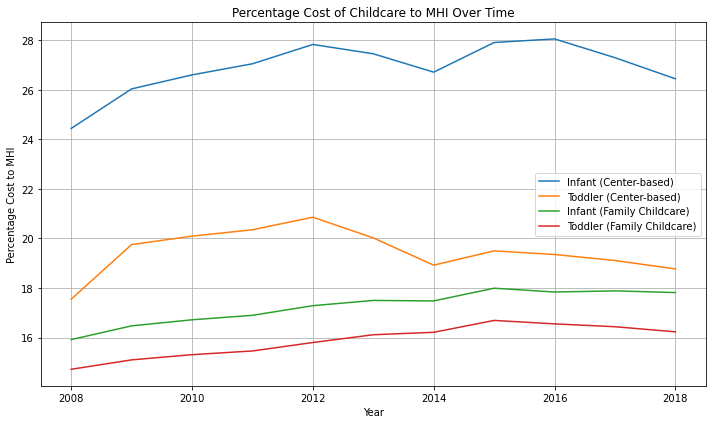

In [16]:
# Group the data by StudyYear
grouped = df.groupby('StudyYear')

# Lists to store data for plotting
years = []
percentage_costs_infant_center = []
percentage_costs_toddler_center = []
percentage_costs_infant_fcc = []
percentage_costs_toddler_fcc = []

for year, group in grouped:
    years.append(year)
    
    # Calculate weighted average costs for each age group in the current year
    total_weighted_cost_infant = group['Infant (Center-based)'] * group['TotalPop']
    total_weighted_cost_toddler = group['Toddler (Center-based)'] * group['TotalPop']
    total_weighted_cost_fcc_infant = group['Infant (Home-based)'] * group['TotalPop']
    total_weighted_cost_fcc_toddler = group['Toddler (Home-based)'] * group['TotalPop']
    
    total_population_infant = group['TotalPop'].sum()
    total_population_toddler = group['TotalPop'].sum()
    total_population_fcc_infant = group['TotalPop'].sum()
    total_population_fcc_toddler = group['TotalPop'].sum()
    
    avg_cost_infant_center = total_weighted_cost_infant.sum() / total_population_infant
    avg_cost_toddler_center = total_weighted_cost_toddler.sum() / total_population_toddler
    avg_cost_infant_fcc = total_weighted_cost_fcc_infant.sum() / total_population_fcc_infant
    avg_cost_toddler_fcc = total_weighted_cost_fcc_toddler.sum() / total_population_fcc_toddler
    
    # Calculate the percentage of childcare cost to MHI
    percentage_cost_infant_center = (avg_cost_infant_center * 52) / group['MHI'].mean() * 100
    percentage_cost_toddler_center = (avg_cost_toddler_center * 52) / group['MHI'].mean() * 100
    percentage_cost_infant_fcc = (avg_cost_infant_fcc * 52) / group['MHI'].mean() * 100
    percentage_cost_toddler_fcc = (avg_cost_toddler_fcc * 52) / group['MHI'].mean() * 100
    
    percentage_costs_infant_center.append(percentage_cost_infant_center)
    percentage_costs_toddler_center.append(percentage_cost_toddler_center)
    percentage_costs_infant_fcc.append(percentage_cost_infant_fcc)
    percentage_costs_toddler_fcc.append(percentage_cost_toddler_fcc)

# Create line plots for percentage costs of childcare to MHI over time
plt.figure(figsize=(10, 6))

plt.plot(years, percentage_costs_infant_center, label='Infant (Center-based)')
plt.plot(years, percentage_costs_toddler_center, label='Toddler (Center-based)')
plt.plot(years, percentage_costs_infant_fcc, label='Infant (Family Childcare)')
plt.plot(years, percentage_costs_toddler_fcc, label='Toddler (Family Childcare)')

plt.xlabel('Year')
plt.ylabel('Percentage Cost to MHI')
plt.title('Percentage Cost of Childcare to MHI Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

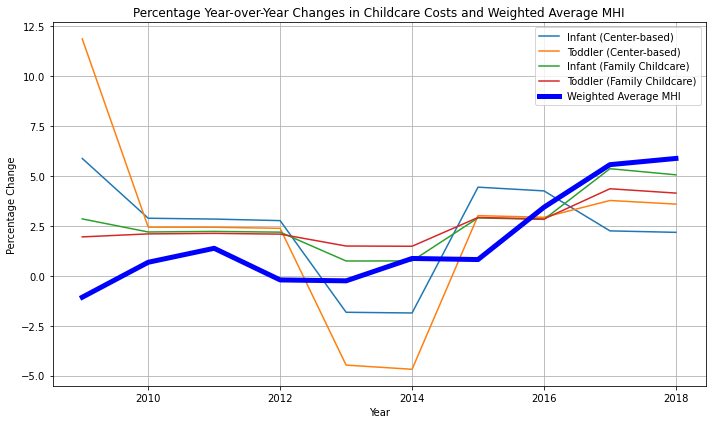

In [17]:
# Create a single line plot combining both datasets
plt.figure(figsize=(10, 6))

# Plot childcare costs data
plt.plot(years[1:], percentage_changes_infant_center, label='Infant (Center-based)')
plt.plot(years[1:], percentage_changes_toddler_center, label='Toddler (Center-based)')
plt.plot(years[1:], percentage_changes_infant_fcc, label='Infant (Family Childcare)')
plt.plot(years[1:], percentage_changes_toddler_fcc, label='Toddler (Family Childcare)')

# Plot weighted average MHI data
percentage_changes.plot(color='blue', linestyle='-', label='Weighted Average MHI', linewidth=5)

plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Year-over-Year Changes in Childcare Costs and Weighted Average MHI')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Above we see that year over year salary percentage changes tend to be less than most childcare prices. Out of the 10 years of change we looked at, 5 of them weighted average MHI had a lower percentage change, 3 of them somewhere in between, and only outpaced childcare price change 2 times. 

In [18]:
shapefile_path = 'CA_Counties_TIGER2016.shp'
gdf_counties = gpd.read_file(shapefile_path)

In [19]:
gdf_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,NaN,NaN,NaN,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,NaN,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,NaN,42200,NaN,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,NaN,NaN,NaN,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,NaN,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


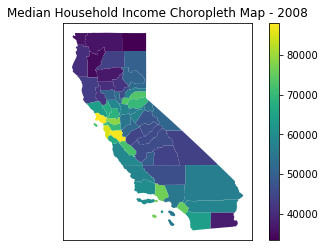

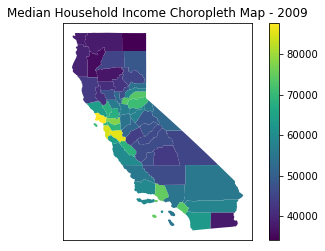

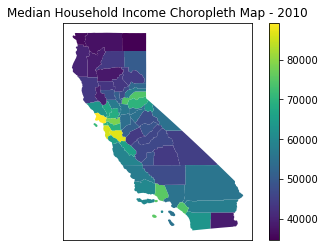

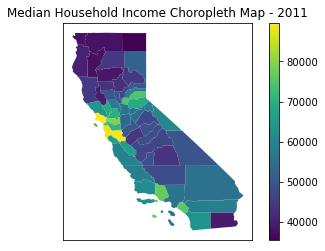

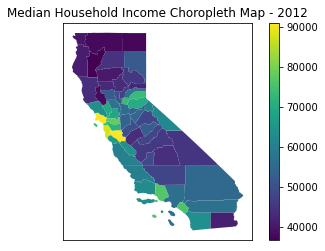

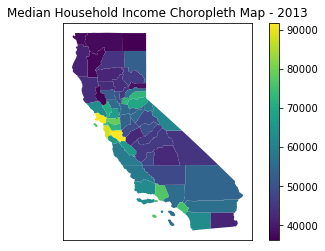

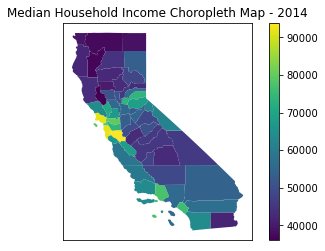

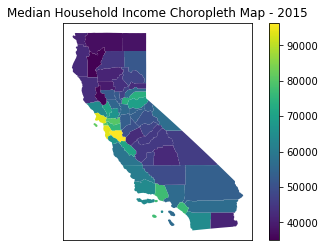

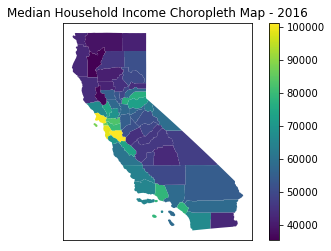

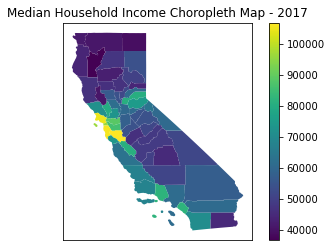

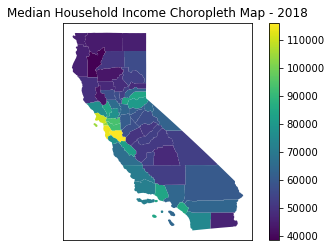

In [20]:
# Rename the column "NAMELSAD" to "County_Name"
gdf_counties = gdf_counties.rename(columns={"NAMELSAD": "County_Name"})

# Replace "County_Name" with the actual column name for county names in both datasets
# Make sure the values in "County_Name" match between the shapefile and your data

# Get unique study years
unique_years = df['StudyYear'].unique()

for year in unique_years:
    merged_gdf = gdf_counties.merge(df[df['StudyYear'] == year], on="County_Name")
    
    # Plot the choropleth map for the current year
    fig, ax = plt.subplots(1, 1)
    merged_gdf.plot(column="MHI", ax=ax, legend=True)
    plt.title(f"Median Household Income Choropleth Map - {year}")
    
    # Remove x and y axis labels and numbers
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()

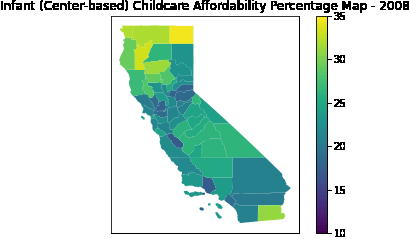

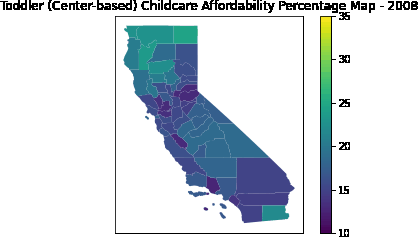

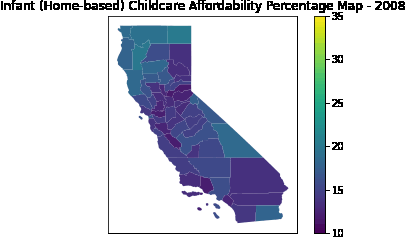

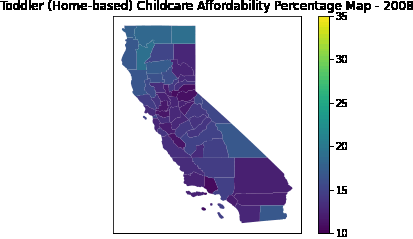

In [21]:
# Replace "County_Name" with the actual column name for county names in both datasets
# Make sure the values in "County_Name" match between the shapefile and your data

# Calculate childcare cost as a percentage of MHI
childcare_types = ['Infant (Center-based)', 'Toddler (Center-based)', 'Infant (Home-based)', 'Toddler (Home-based)']
for childcare_type in childcare_types:
    df[childcare_type + '_Percentage'] = (df[childcare_type] * 52) / df['MHI'] * 100

# Get unique study years
unique_years = df['StudyYear'].unique()

# Loop through each type of childcare
for childcare_type in childcare_types:
    # Create an empty list to store images
    images = []
    
    # Loop through each year and create maps
    for year in unique_years:
        merged_gdf = gdf_counties.merge(df[(df['StudyYear'] == year)], on="County_Name")
        
        # Plot the choropleth map
        fig, ax = plt.subplots(1, 1)
        merged_gdf.plot(column=childcare_type + '_Percentage', ax=ax, legend=True, vmin = 10, vmax = 35)
        plt.title(f"{childcare_type} Childcare Affordability Percentage Map - {year}")
        
        # Remove x and y axis labels and numbers
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Save the map as an image
        image_filename = f'map_{childcare_type}_{year}.png'
        plt.savefig(image_filename, bbox_inches='tight', pad_inches=0)
        plt.close()
        
        # Append the image filename to the list
        images.append(image_filename)
    
    # Generate GIF from images
    gif_filename = f'{childcare_type}_affordability.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=1) as writer:
        for image in images:
            img = imageio.imread(image)
            writer.append_data(img)
    
    # Display the generated GIF in the notebook
    display(Image(filename=gif_filename))

    # Clean up temporary image files
    for image in images:
        os.remove(image)


More populous areas seem to be relatively cheaper than other areas. 

# Conclusion

In this phase of the project, our thorough examination of the data has uncovered some intriguing insights. When we looked at the data visually, we noticed something interesting: the figures for toddler and preschool childcare categories were exactly the same. To make things clearer, we decided to focus on infants and toddlers, treating toddler data as a stand-in for preschoolers. This simplification made our analysis more focused and accurate.

Our main goal was to understand how Median Household Income (MHI) and childcare costs are connected. By creating visualizations for both sets of data, we gained valuable insights into their trends. Contrary to what we initially thought, wage growth showed a slow start in the beginning years, followed by a sudden rise. This could be due to the economy recovering after the Great Recession, resulting in unexpectedly strong MHI growth in recent times.

Analyzing childcare costs on their own showed a consistent increase each year, suggesting a stable trend. Comparing year-over-year salary changes with childcare price shifts brought up interesting findings. Over the ten years we studied, MHI had lower percentage changes in five instances, was in between in three cases, and exceeded childcare cost changes only twice.

Another surprising discovery came from looking at geographical influences. We found that regions with denser populations tended to have relatively lower childcare costs compared to income. This unexpected finding sheds new light on the relationship.

To sum up, our exploratory data analysis has revealed intricate connections between Median Household Income and childcare costs. These insights not only enhance our understanding of economic patterns but also highlight the various factors impacting childcare affordability. As we move forward, our next steps involve weaving these discoveries into a comprehensive understanding of the underlying dynamics and their implications.